# UFO Sightings Analysis

## Load the CSV file
### Noah Code Starts here

In [2]:
# Import any needed functionality
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st


# This will hide any of the small pink messages
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Set file path
file = ("UFO_Data/US_UFO_Sightings.csv")

# Read the csv file
us_ufo_data = pd.read_csv(file)

In [4]:
# Display the csv file as a dataframe
us_ufo_df = pd.DataFrame(us_ufo_data)
us_ufo_df.head()

,Unnamed: 0,city,state,country,shape,comments,latitude,longitude,date,time
0,0,san marcos,tx,us,cylinder,This event took place in early fall around 194...,29.883056,-97.941111,10/10/1949,20:30
1,3,edna,tx,us,circle,My older brother and twin sister were leaving ...,28.978333,-96.645833,10/10/1956,21:00
2,4,kaneohe,hi,us,light,AS a Marine 1st Lt. flying an FJ4B fighter/att...,21.418056,-157.803611,10/10/1960,20:00
3,5,bristol,tn,us,sphere,My father is now 89 my brother 52 the girl wit...,36.595000,-82.188889,10/10/1961,19:00
4,7,norwalk,ct,us,disk,A bright orange color changing to reddish colo...,41.117500,-73.408333,10/10/1965,23:45


In [5]:
# Remove the "Unnamed: 0" index row that accidently came through in the cleaned file
us_ufo_data = us_ufo_df.drop(columns = ["Unnamed: 0"])
us_ufo_data.head()

,city,state,country,shape,comments,latitude,longitude,date,time
0,san marcos,tx,us,cylinder,This event took place in early fall around 194...,29.883056,-97.941111,10/10/1949,20:30
1,edna,tx,us,circle,My older brother and twin sister were leaving ...,28.978333,-96.645833,10/10/1956,21:00
2,kaneohe,hi,us,light,AS a Marine 1st Lt. flying an FJ4B fighter/att...,21.418056,-157.803611,10/10/1960,20:00
3,bristol,tn,us,sphere,My father is now 89 my brother 52 the girl wit...,36.595000,-82.188889,10/10/1961,19:00
4,norwalk,ct,us,disk,A bright orange color changing to reddish colo...,41.117500,-73.408333,10/10/1965,23:45


## Initial Analysis

### Learning more about our data

In [ ]:
# Find the length of the dataframe?
# How many sightings are recordered?
print(len(us_ufo_data))

In [9]:
# What is the min and max range for the years?
us_ufo_min_year = us_ufo_data["date"].min()
us_ufo_min_year

us_ufo_max_year = us_ufo_data["date"].max()
us_ufo_max_year

print(f"This dataset ranges from sightings recorded in {us_ufo_min_year} to {us_ufo_max_year}")

This dataset ranges from sightings recorded in 1/1/1910 to 9/9/2013


In [11]:
# What are all of the unique values given for the shape column?
alien_cars = us_ufo_data["shape"].unique()
alien_cars

array(['cylinder', 'circle', 'light', 'sphere', 'disk', 'fireball',
       'unknown', 'oval', 'other', 'rectangle', 'chevron', 'formation',
       'triangle', 'cigar', 'delta', 'changing', 'diamond', 'flash',
       'egg', 'teardrop', 'cone', 'cross', 'pyramid', 'round', 'flare',
       'hexagon', 'crescent', 'changed'], dtype=object)

### Where do aliens like to visit?

In [47]:
# Look at the state data to see which state is most visited
# Use a groupby to get the count
state_group = us_ufo_data.groupby("state")
state_group

state_visits = state_group["time"].count()
#state_visits

state
ak     311
al     629
ar     578
az    2362
ca    8683
co    1385
ct     865
dc       7
de     165
fl    3754
ga    1235
hi     257
ia     669
id     508
il    2447
in    1268
ks     599
ky     843
la     547
ma    1238
md     818
me     544
mi    1781
mn     996
mo    1431
ms     368
mt     460
nc    1722
nd     123
ne     373
nh     482
nj    1236
nm     693
nv     778
ny    2915
oh    2251
ok     714
or    1667
pa    2319
pr      24
ri     224
sc     986
sd     177
tn    1091
tx    3398
ut     611
va    1248
vt     254
wa    3707
wi    1205
wv     438
wy     169
Name: time, dtype: int64

In [49]:
# Get the names of all of the different drug regimens to be used in the x axis
states = us_ufo_data["state"].unique()

# Need to read the list alphabetically to match with tick locations
states_alph = sorted(states)
#states_alph

['ak',
 'al',
 'ar',
 'az',
 'ca',
 'co',
 'ct',
 'dc',
 'de',
 'fl',
 'ga',
 'hi',
 'ia',
 'id',
 'il',
 'in',
 'ks',
 'ky',
 'la',
 'ma',
 'md',
 'me',
 'mi',
 'mn',
 'mo',
 'ms',
 'mt',
 'nc',
 'nd',
 'ne',
 'nh',
 'nj',
 'nm',
 'nv',
 'ny',
 'oh',
 'ok',
 'or',
 'pa',
 'pr',
 'ri',
 'sc',
 'sd',
 'tn',
 'tx',
 'ut',
 'va',
 'vt',
 'wa',
 'wi',
 'wv',
 'wy']

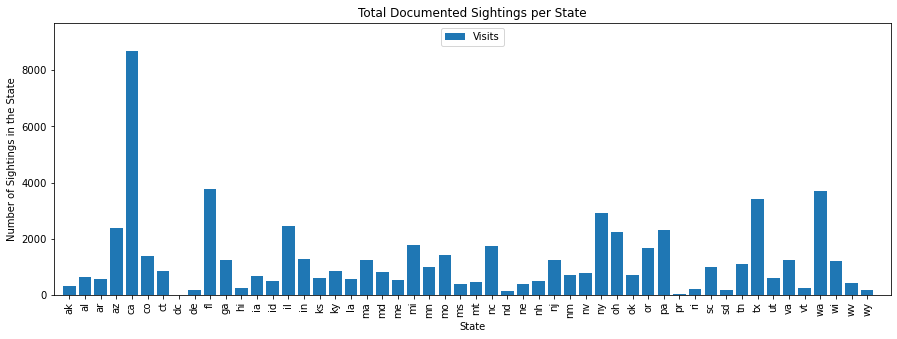

In [51]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(0, len(states))

tick_locations = []

for x in x_axis:
    tick_locations.append(x)


# Change the size of the chart to make it more readable
plt.figure(figsize = (15, 5))

# Plot the bar chart
plt.bar(x_axis, state_visits, align = "center")
plt.xticks(tick_locations, states_alph, rotation = 90)

# Add legend to match above chart visually
plt.legend(["Visits"], loc = "upper center")

# Create labels for the bar plot
plt.title("Total Documented Sightings per State")
plt.xlabel("State")
plt.ylabel("Number of Sightings in the State")

# Set limits for each chart
plt.xlim(-1, len(states_alph) + 0.5)
plt.ylim(0, max(state_visits) + 1000)

# Best practice to always include plt.show
# Even though it is not technically needed in jupyter notebooks
plt.show()

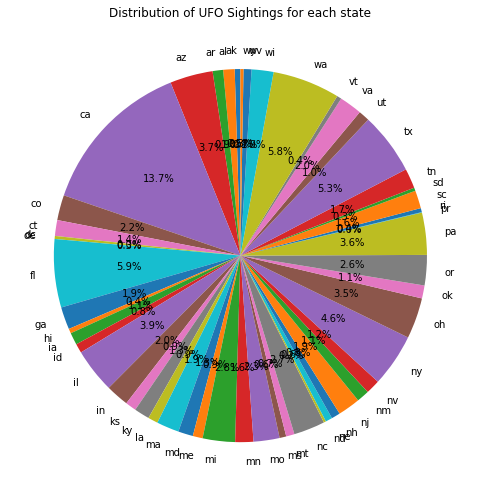

In [35]:
# Generate a pie plot showing the distribution of visits across the states
# Labels for the sections of our pie chart
labels = states


plt.figure(figsize = (35, 7))


# Tell matplotlib to create a pie chart filled with corresponding percentages and displayed vertically
plt.pie(state_visits, labels = state_visits.index.values, autopct="%1.1f%%", startangle=90)
plt.title("Distribution of UFO Sightings for each state")

# Display resulting plot
plt.tight_layout()
plt.show()

In [ ]:
# What city within the most visited state?

# What city is visited the most regardless of state visits? (Better vacation spot?)

In [ ]:
# US Heatmap for alien visits over the years
## Look back at last homework example

### What season do aliens like to vacation to earth?

In [ ]:
# Create a new column that seperates the months into seasons
# See which season has the most visits

### Best time for cow abduction?

In [ ]:
# Scatter plot to see if the time of day has any correlation with total number of visits

### Do they keep coming back?

In [ ]:
# See if the total number of sightings per yer has changed?
# Scatter plot - DO WE NEED TO PULL YEAR TO ITS OWN COLUMN??

### Noah Code Ends here

## Deeper Analysis
### Mahnoor Code Starts here

### Regression or hypothesis testing

In [ ]:
# Regression possibilities

#    Can we predict the number of total sightings for 2016?
#    What city will have the highest visits in 2016?
#    Can we predict what region an alien is most likely to visit on their next vacation to earth?

In [ ]:
# Hypothesis testing possibilities

#    We believe that aliens prefer to visit at night, and that sightings will most likely happen between 10pm and 2am
#    We think us excitement around aliens peaks around halloween, so the majority of sightings will be in the fall (Sept - Nov)
#    We believe the midwest, not the southwest (area 51) will have the most sightings (More cows to abduct!!)
#    Is area 51 (Nevada and surrounding area) turly the hub of all recorded alien activity??

In [ ]:
## We could potentially look at the 2016 csv we almost used to see how accurate our predictions were??
## Idk if that would be a stretch or like bad to compare (apples to oranges?)

### Mahnoor Code Ends here